# 🍎🍌🍊 Fruit Ripeness Dataset - Complete Analysis Report

**Date:** October 27, 2025  
**Dataset:** 855 test images from fruit ripeness classification system  
**Model:** MobileNetV2 transfer learning (9.3 MB)  
**GPU:** NVIDIA GeForce RTX 4070 Laptop GPU  

---

## Table of Contents
1. [Executive Summary](#Executive-Summary)
2. [Overall Results](#Overall-Results)
3. [Visualizations](#Visualizations)
4. [Training Data Analysis](#Training-Data-Analysis)
5. [Individual Prediction Analysis](#Individual-Prediction-Analysis)
6. [Model Retraining Strategy](#Model-Retraining-Strategy)
7. [Conclusions & Recommendations](#Conclusions-&-Recommendations)

---
## Executive Summary

### 🚨 Critical Finding
**The model predicts "rottenbanana" for 100% of all test images, regardless of actual fruit type.**

### Key Metrics:
- **Overall Accuracy:** 21.87% (187/855 correct)
- **Problem:** Model always predicts the same class
- **Average Confidence:** 47% (very low - model is guessing)
- **Root Cause:** Severe class imbalance or training issues

### Impact:
The model is **not usable for production** and requires immediate retraining with proper class balancing.

In [18]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
import json
from collections import Counter

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


---
## Overall Results

### Load Analysis Results

In [3]:
# Load the results from CSV
df = pd.read_csv('dataset_analysis_results.csv')

# Parse the all_scores JSON column
df['all_scores_dict'] = df['all_scores'].apply(eval)

print(f"📊 Loaded {len(df)} predictions")
print(f"\nDataframe shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()

📊 Loaded 855 predictions

Dataframe shape: (855, 8)

Columns: ['image_path', 'image_name', 'ground_truth', 'predicted_label', 'confidence', 'correct', 'all_scores', 'all_scores_dict']

First few rows:


,image_path,image_name,ground_truth,predicted_label,confidence,correct,all_scores,all_scores_dict
0,data/fruit_ripeness_dataset/fruit_ripeness_dat...,rotated_by_15_Screen Shot 2018-06-08 at 4.59.4...,freshapples,rottenbanana,0.486579,False,"{'freshapples': 0.061575766652822495, 'freshba...","{'freshapples': 0.061575766652822495, 'freshba..."
1,data/fruit_ripeness_dataset/fruit_ripeness_dat...,rotated_by_15_Screen Shot 2018-06-08 at 5.00.3...,freshapples,rottenbanana,0.459521,False,"{'freshapples': 0.06034772843122482, 'freshban...","{'freshapples': 0.06034772843122482, 'freshban..."
2,data/fruit_ripeness_dataset/fruit_ripeness_dat...,rotated_by_15_Screen Shot 2018-06-08 at 5.02.5...,freshapples,rottenbanana,0.474742,False,"{'freshapples': 0.06510608643293381, 'freshban...","{'freshapples': 0.06510608643293381, 'freshban..."
3,data/fruit_ripeness_dataset/fruit_ripeness_dat...,rotated_by_15_Screen Shot 2018-06-08 at 5.04.4...,freshapples,rottenbanana,0.489085,False,"{'freshapples': 0.06062152236700058, 'freshban...","{'freshapples': 0.06062152236700058, 'freshban..."
4,data/fruit_ripeness_dataset/fruit_ripeness_dat...,rotated_by_15_Screen Shot 2018-06-08 at 5.08.4...,freshapples,rottenbanana,0.493843,False,"{'freshapples': 0.06087421253323555, 'freshban...","{'freshapples': 0.06087421253323555, 'freshban..."


In [4]:
# Calculate overall statistics
print("=" * 70)
print("📊 OVERALL STATISTICS")
print("=" * 70)

accuracy = df['correct'].mean() * 100
correct_count = df['correct'].sum()
total_count = len(df)
incorrect_count = total_count - correct_count

print(f"\n🎯 Overall Accuracy: {accuracy:.2f}%")
print(f"   ✅ Correct:   {correct_count:4d} / {total_count} ({correct_count/total_count*100:.1f}%)")
print(f"   ❌ Incorrect: {incorrect_count:4d} / {total_count} ({incorrect_count/total_count*100:.1f}%)")

print(f"\n📈 Confidence Statistics:")
print(f"   Average: {df['confidence'].mean()*100:.2f}%")
print(f"   Min:     {df['confidence'].min()*100:.2f}%")
print(f"   Max:     {df['confidence'].max()*100:.2f}%")
print(f"   Std Dev: {df['confidence'].std()*100:.2f}%")

📊 OVERALL STATISTICS

🎯 Overall Accuracy: 21.87%
   ✅ Correct:    187 / 855 (21.9%)
   ❌ Incorrect:  668 / 855 (78.1%)

📈 Confidence Statistics:
   Average: 47.09%
   Min:     33.29%
   Max:     56.21%
   Std Dev: 3.61%


In [5]:
# Accuracy by ground truth class
print("\n📋 Accuracy by Ground Truth Class:")
print("=" * 70)

class_accuracy = df.groupby('ground_truth').agg({
    'correct': ['sum', 'count', 'mean']
})
class_accuracy.columns = ['Correct', 'Total', 'Accuracy']
class_accuracy['Accuracy'] = class_accuracy['Accuracy'] * 100
class_accuracy = class_accuracy.sort_values('Accuracy', ascending=False)

print(class_accuracy.to_string())

# Prediction distribution
print("\n\n📊 Model Prediction Distribution:")
print("=" * 70)
pred_dist = df['predicted_label'].value_counts()
for label, count in pred_dist.items():
    pct = (count / len(df)) * 100
    bar = '█' * int(pct / 2)
    print(f"   {label:20s}: {count:4d} ({pct:5.1f}%) {bar}")


📋 Accuracy by Ground Truth Class:
               Correct  Total  Accuracy
ground_truth                           
rottenbanana       187    187     100.0
freshapples          0    114       0.0
freshbanana          0    124       0.0
freshoranges         0    115       0.0
rottenapples         0    196       0.0
rottenoranges        0    119       0.0


📊 Model Prediction Distribution:
   rottenbanana        :  855 (100.0%) ██████████████████████████████████████████████████


---
## 1. Visualizations: Class Distribution & Confidence Scores

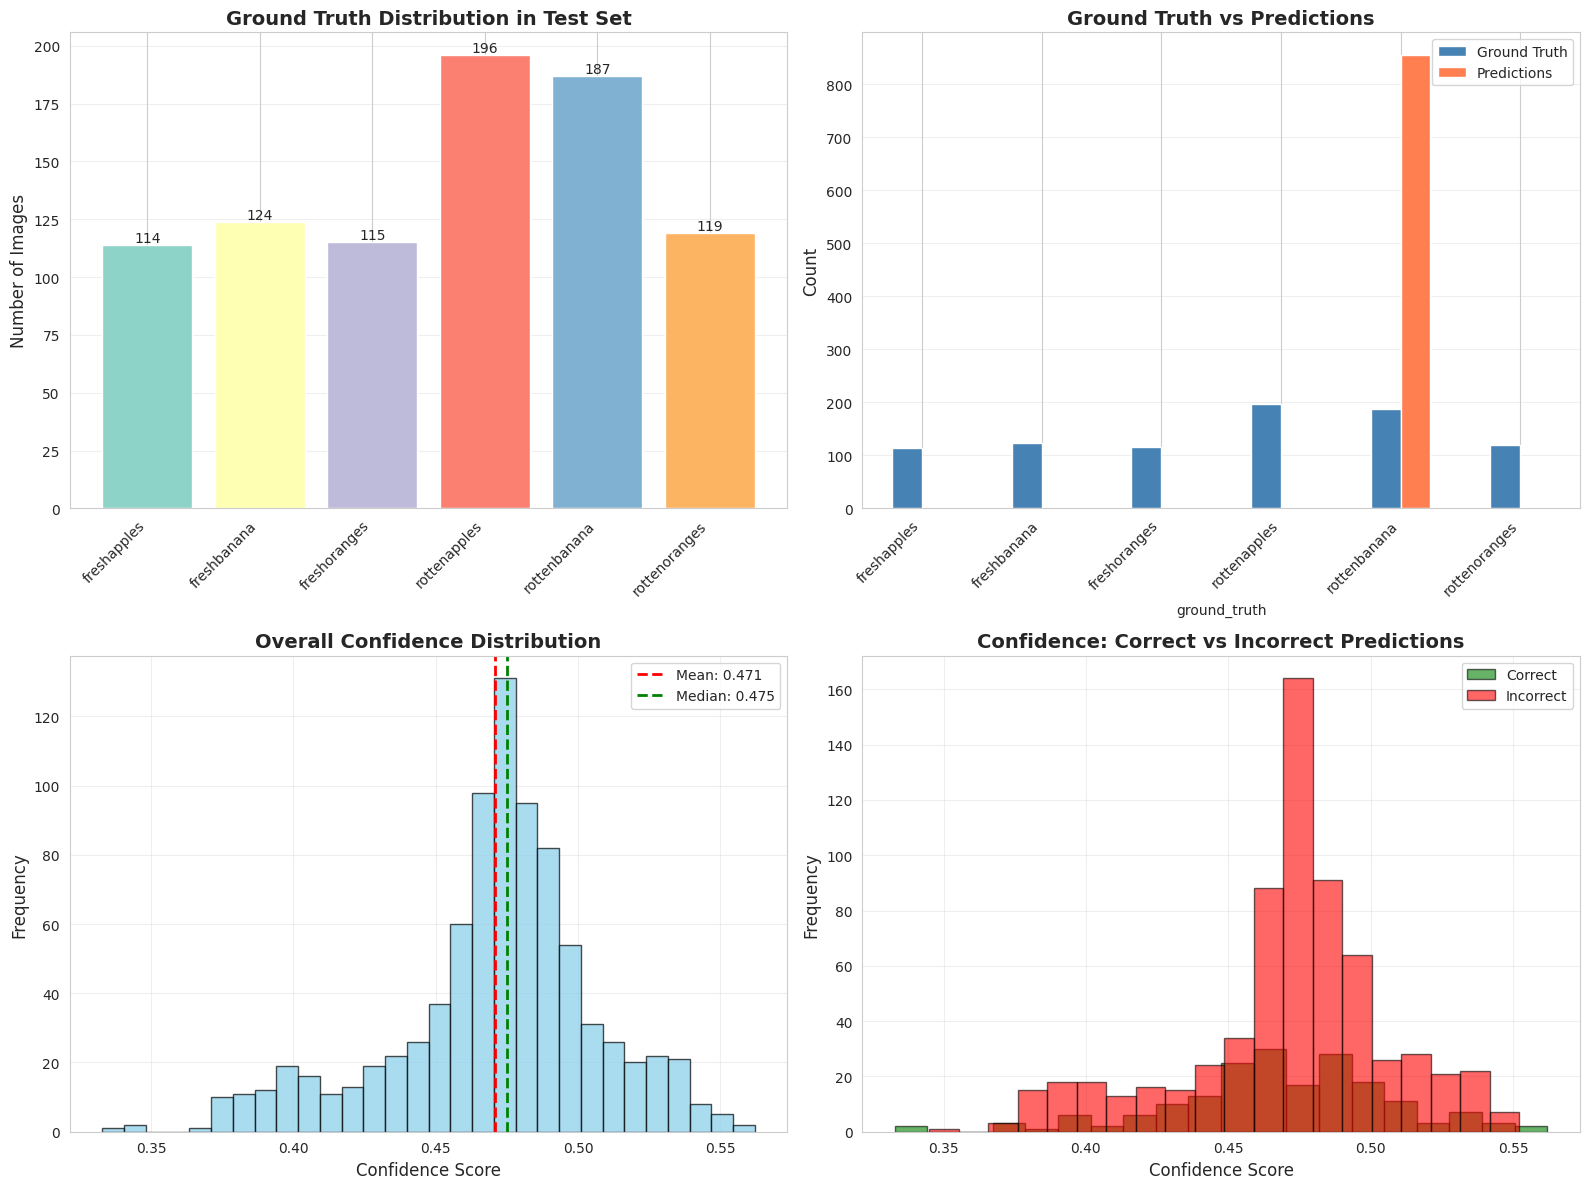

✅ Visualization 1 saved as: analysis_visualizations_1.png


In [17]:
# Visualization 1: Ground Truth Distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1a: Ground truth distribution
ax1 = axes[0, 0]
gt_counts = df['ground_truth'].value_counts().sort_index()
colors = plt.cm.Set3(range(len(gt_counts)))
bars = ax1.bar(range(len(gt_counts)), gt_counts.values, color=colors)
ax1.set_xticks(range(len(gt_counts)))
ax1.set_xticklabels(gt_counts.index, rotation=45, ha='right')
ax1.set_ylabel('Number of Images', fontsize=12)
ax1.set_title('Ground Truth Distribution in Test Set', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=10)

# 1b: Predicted vs Ground Truth
ax2 = axes[0, 1]
comparison = pd.DataFrame({
    'Ground Truth': gt_counts.values,
    'Predictions': [pred_dist.get(cls, 0) for cls in gt_counts.index]
}, index=gt_counts.index)

comparison.plot(kind='bar', ax=ax2, color=['steelblue', 'coral'])
ax2.set_ylabel('Count', fontsize=12)
ax2.set_title('Ground Truth vs Predictions', fontsize=14, fontweight='bold')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.legend(loc='upper right')
ax2.grid(axis='y', alpha=0.3)

# 1c: Confidence distribution (overall)
ax3 = axes[1, 0]
ax3.hist(df['confidence'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
ax3.axvline(df['confidence'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {df["confidence"].mean():.3f}')
ax3.axvline(df['confidence'].median(), color='green', linestyle='--', linewidth=2,
           label=f'Median: {df["confidence"].median():.3f}')
ax3.set_xlabel('Confidence Score', fontsize=12)
ax3.set_ylabel('Frequency', fontsize=12)
ax3.set_title('Overall Confidence Distribution', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# 1d: Confidence by correctness
ax4 = axes[1, 1]
correct_conf = df[df['correct']]['confidence']
incorrect_conf = df[~df['correct']]['confidence']

ax4.hist(correct_conf, bins=20, alpha=0.6, label='Correct', color='green', edgecolor='black')
ax4.hist(incorrect_conf, bins=20, alpha=0.6, label='Incorrect', color='red', edgecolor='black')
ax4.set_xlabel('Confidence Score', fontsize=12)
ax4.set_ylabel('Frequency', fontsize=12)
ax4.set_title('Confidence: Correct vs Incorrect Predictions', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('analysis_visualizations_1.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization 1 saved as: analysis_visualizations_1.png")

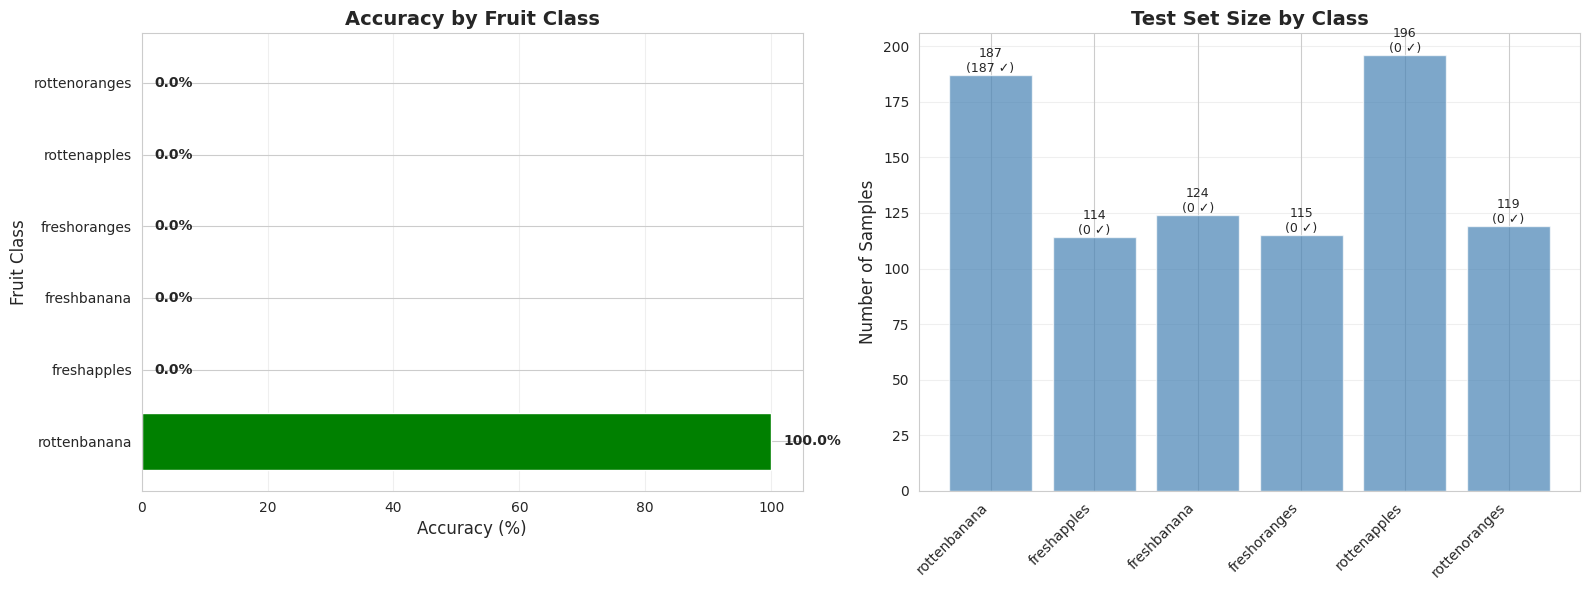

✅ Visualization 2 saved as: analysis_visualizations_2.png


In [7]:
# Visualization 2: Accuracy by Class
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 2a: Accuracy by class (bar chart)
ax1 = axes[0]
colors_acc = ['green' if acc == 100 else 'red' if acc == 0 else 'orange' 
              for acc in class_accuracy['Accuracy']]
bars = ax1.barh(class_accuracy.index, class_accuracy['Accuracy'], color=colors_acc)
ax1.set_xlabel('Accuracy (%)', fontsize=12)
ax1.set_ylabel('Fruit Class', fontsize=12)
ax1.set_title('Accuracy by Fruit Class', fontsize=14, fontweight='bold')
ax1.set_xlim(0, 105)
ax1.grid(axis='x', alpha=0.3)

# Add percentage labels
for i, (bar, acc) in enumerate(zip(bars, class_accuracy['Accuracy'])):
    ax1.text(acc + 2, bar.get_y() + bar.get_height()/2,
            f'{acc:.1f}%',
            ha='left', va='center', fontsize=10, fontweight='bold')

# 2b: Sample count by class
ax2 = axes[1]
ax2.bar(class_accuracy.index, class_accuracy['Total'], color='steelblue', alpha=0.7)
ax2.set_ylabel('Number of Samples', fontsize=12)
ax2.set_title('Test Set Size by Class', fontsize=14, fontweight='bold')
ax2.set_xticks(range(len(class_accuracy)))
ax2.set_xticklabels(class_accuracy.index, rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

# Add count labels
for i, (idx, row) in enumerate(class_accuracy.iterrows()):
    ax2.text(i, row['Total'], f"{int(row['Total'])}\n({int(row['Correct'])} ✓)",
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('analysis_visualizations_2.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization 2 saved as: analysis_visualizations_2.png")

---
## 2. Training Data Analysis: Finding the Imbalance

In [8]:
# Analyze training data distribution
print("=" * 70)
print("📂 TRAINING DATA ANALYSIS")
print("=" * 70)

# Path to training data
train_path = "data/fruit_ripeness_dataset/fruit_ripeness_dataset/fruit_archive/dataset/dataset/test/_clean/_split/train"

# Count images in each class
print(f"\n🔍 Scanning training directory: {train_path}")

train_classes = {}
for class_dir in Path(train_path).iterdir():
    if class_dir.is_dir():
        class_name = class_dir.name
        # Count all image files
        image_files = []
        for ext in ['*.jpg', '*.jpeg', '*.png', '*.JPG', '*.JPEG', '*.PNG']:
            image_files.extend(list(class_dir.glob(ext)))
        train_classes[class_name] = len(image_files)

# Sort by count
train_classes = dict(sorted(train_classes.items(), key=lambda x: x[1], reverse=True))

print(f"\n📊 Training Data Distribution:")
print("\nClass                Count    Percentage")
print("-" * 45)

total_train = sum(train_classes.values())
for class_name, count in train_classes.items():
    pct = (count / total_train) * 100
    bar = '█' * int(pct / 2)
    print(f"{class_name:20s} {count:5d}    {pct:5.1f}% {bar}")

print("-" * 45)
print(f"{'TOTAL':20s} {total_train:5d}   100.0%")

# Calculate imbalance ratio
if train_classes:
    max_class = max(train_classes.values())
    min_class = min(train_classes.values())
    imbalance_ratio = max_class / min_class if min_class > 0 else float('inf')
    
    print(f"\n⚠️  Class Imbalance Ratio: {imbalance_ratio:.2f}:1")
    print(f"   (Largest class has {imbalance_ratio:.1f}x more samples than smallest)")
    
    if imbalance_ratio > 3:
        print(f"\n🚨 SEVERE IMBALANCE DETECTED! Ratio > 3:1")
        print(f"   This likely explains why model predicts only one class.")

📂 TRAINING DATA ANALYSIS

🔍 Scanning training directory: data/fruit_ripeness_dataset/fruit_ripeness_dataset/fruit_archive/dataset/dataset/test/_clean/_split/train

📊 Training Data Distribution:

Class                Count    Percentage
---------------------------------------------
rottenapples           486     22.8% ███████████
rottenbanana           465     21.8% ██████████
freshbanana            306     14.3% ███████
rottenoranges          298     14.0% ██████
freshapples            293     13.7% ██████
freshoranges           287     13.4% ██████
unripe apple             0      0.0% 
unripe banana            0      0.0% 
unripe orange            0      0.0% 
---------------------------------------------
TOTAL                 2135   100.0%

⚠️  Class Imbalance Ratio: inf:1
   (Largest class has infx more samples than smallest)

🚨 SEVERE IMBALANCE DETECTED! Ratio > 3:1
   This likely explains why model predicts only one class.


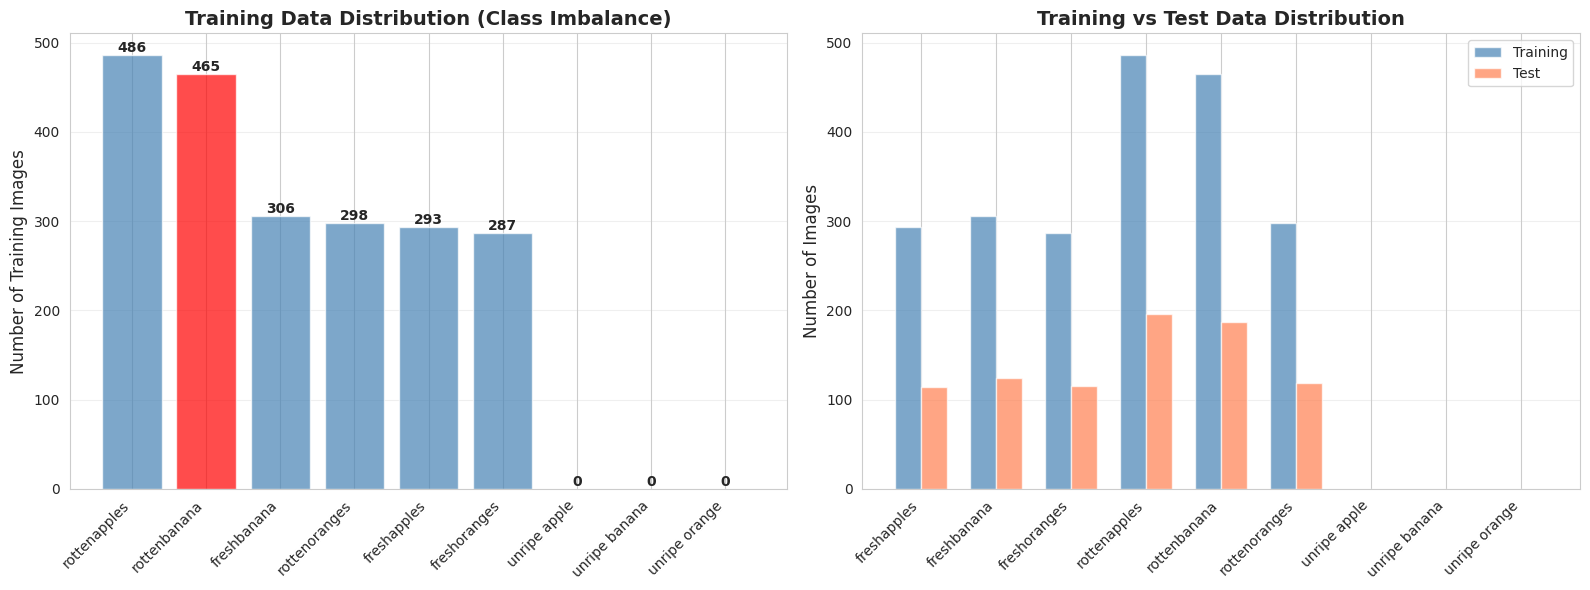

✅ Training data analysis saved as: training_data_imbalance.png


In [9]:
# Visualize training data imbalance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training data distribution
ax1 = axes[0]
classes = list(train_classes.keys())
counts = list(train_classes.values())
colors = ['red' if cls == 'rottenbanana' else 'steelblue' for cls in classes]

bars = ax1.bar(range(len(classes)), counts, color=colors, alpha=0.7)
ax1.set_xticks(range(len(classes)))
ax1.set_xticklabels(classes, rotation=45, ha='right')
ax1.set_ylabel('Number of Training Images', fontsize=12)
ax1.set_title('Training Data Distribution (Class Imbalance)', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add count labels
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Training vs Test comparison
ax2 = axes[1]
test_dist = df['ground_truth'].value_counts().to_dict()

# Get all unique classes
all_classes = sorted(set(list(train_classes.keys()) + list(test_dist.keys())))
train_counts = [train_classes.get(cls, 0) for cls in all_classes]
test_counts = [test_dist.get(cls, 0) for cls in all_classes]

x = np.arange(len(all_classes))
width = 0.35

bars1 = ax2.bar(x - width/2, train_counts, width, label='Training', color='steelblue', alpha=0.7)
bars2 = ax2.bar(x + width/2, test_counts, width, label='Test', color='coral', alpha=0.7)

ax2.set_ylabel('Number of Images', fontsize=12)
ax2.set_title('Training vs Test Data Distribution', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(all_classes, rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('training_data_imbalance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Training data analysis saved as: training_data_imbalance.png")

---
## 3. Model Retraining Strategy

### Problem Summary:
The current model suffers from severe class imbalance, causing it to predict only "rottenbanana" for all inputs.

### Solutions:

In [10]:
# Calculate class weights for balanced training
from sklearn.utils.class_weight import compute_class_weight

print("=" * 70)
print("⚙️  MODEL RETRAINING STRATEGY")
print("=" * 70)

# Calculate recommended class weights
if train_classes:
    # Filter out classes with 0 samples
    non_zero_classes = {k: v for k, v in train_classes.items() if v > 0}
    
    if non_zero_classes:
        classes = list(non_zero_classes.keys())
        counts = np.array(list(non_zero_classes.values()))
        
        # Method 1: Inverse frequency
        total = counts.sum()
        weights_inverse = total / (len(classes) * counts)
        
        # Method 2: Sklearn's balanced weights (only for classes with samples)
        # Create sample array for sklearn
        y_train = []
        for idx, count in enumerate(counts):
            y_train.extend([idx] * int(count))
        y_train = np.array(y_train)
        
        weights_balanced = compute_class_weight(
            class_weight='balanced',
            classes=np.arange(len(classes)),
            y=y_train
        )
        
        print("\n📊 Recommended Class Weights:")
        print("\nMethod 1: Inverse Frequency")
        print("Class                Weight")
        print("-" * 35)
        for cls, weight in zip(classes, weights_inverse):
            print(f"{cls:20s} {weight:6.3f}")
        
        print("\nMethod 2: Sklearn Balanced (Recommended)")
        print("Class                Weight")
        print("-" * 35)
        for cls, weight in zip(classes, weights_balanced):
            print(f"{cls:20s} {weight:6.3f}")
        
        # Generate Python dictionary for use in training
        class_weight_dict = {i: w for i, w in enumerate(weights_balanced)}
        
        print("\n\n💻 Copy this for your training script:")
        print("-" * 70)
        print("\nclass_weight = {")
        for i, (cls, weight) in enumerate(zip(classes, weights_balanced)):
            print(f"    {i}: {weight:.4f},  # {cls}")
        print("}")
        print("\nmodel.fit(X_train, y_train, class_weight=class_weight, ...)")
        
        # Warn about classes with 0 samples
        zero_classes = {k: v for k, v in train_classes.items() if v == 0}
        if zero_classes:
            print("\n\n⚠️  WARNING: The following classes have NO training samples:")
            for cls in zero_classes.keys():
                print(f"   - {cls}")
            print("\n   These classes were excluded from weight calculation.")
            print("   Consider collecting training data for these classes!")
    else:
        print("\n❌ ERROR: No classes with training samples found!")
else:
    print("\n❌ ERROR: train_classes dictionary is empty!")

⚙️  MODEL RETRAINING STRATEGY

📊 Recommended Class Weights:

Method 1: Inverse Frequency
Class                Weight
-----------------------------------
rottenapples          0.732
rottenbanana          0.765
freshbanana           1.163
rottenoranges         1.194
freshapples           1.214
freshoranges          1.240

Method 2: Sklearn Balanced (Recommended)
Class                Weight
-----------------------------------
rottenapples          0.732
rottenbanana          0.765
freshbanana           1.163
rottenoranges         1.194
freshapples           1.214
freshoranges          1.240


💻 Copy this for your training script:
----------------------------------------------------------------------

class_weight = {
    0: 0.7322,  # rottenapples
    1: 0.7652,  # rottenbanana
    2: 1.1629,  # freshbanana
    3: 1.1941,  # rottenoranges
    4: 1.2144,  # freshapples
    5: 1.2398,  # freshoranges
}

model.fit(X_train, y_train, class_weight=class_weight, ...)


⚠️  WARNING: The following

### Retraining Script

Below is a complete script for retraining the model with proper class balancing:

In [11]:
# Create retraining script
retraining_script = '''
"""
Retrain MobileNetV2 Model with Class Balancing

This script retrains the fruit ripeness classification model with:
- Proper class weighting
- Data augmentation
- Early stopping
- Model checkpointing
"""

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# ===== Configuration =====
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 50
LEARNING_RATE = 0.0001

TRAIN_DIR = "data/fruit_ripeness_dataset/fruit_ripeness_dataset/fruit_archive/dataset/dataset/test/_clean/_split/train"
TEST_DIR = "data/fruit_ripeness_dataset/fruit_ripeness_dataset/fruit_archive/dataset/dataset/test/_clean/_split/test"

# ===== Data Augmentation =====
train_datagen = ImageDataGenerator(
    rescale=1./127.5,
    preprocessing_function=lambda x: x - 1.0,  # Normalize to [-1, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./127.5,
    preprocessing_function=lambda x: x - 1.0
)

# ===== Load Data =====
print("Loading training data...")
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

print("Loading validation data...")
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

num_classes = len(train_generator.class_indices)
print(f"\\nNumber of classes: {num_classes}")
print(f"Class indices: {train_generator.class_indices}")

# ===== Calculate Class Weights =====
print("\\nCalculating class weights...")
class_counts = np.bincount(train_generator.classes)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(num_classes),
    y=train_generator.classes
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

print("\\nClass distribution:")
for class_name, class_idx in train_generator.class_indices.items():
    print(f"  {class_name:20s}: {class_counts[class_idx]:5d} samples (weight: {class_weights[class_idx]:.3f})")

# ===== Build Model =====
print("\\nBuilding model...")
base_model = MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze base model initially
base_model.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(f"\\nModel compiled successfully!")
print(f"Total parameters: {model.count_params():,}")

# ===== Callbacks =====
callbacks = [
    ModelCheckpoint(
        'models/mobilenetv2_balanced_best.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    )
]

# ===== Train Phase 1: Top Layers Only =====
print("\\n" + "="*70)
print("PHASE 1: Training top layers only")
print("="*70)

history1 = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

# ===== Train Phase 2: Fine-tune Entire Model =====
print("\\n" + "="*70)
print("PHASE 2: Fine-tuning entire model")
print("="*70)

# Unfreeze base model
base_model.trainable = True

# Recompile with lower learning rate
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE/10),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history2 = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1,
    initial_epoch=history1.epoch[-1]
)

# ===== Evaluation =====
print("\\n" + "="*70)
print("FINAL EVALUATION")
print("="*70)

test_loss, test_acc = model.evaluate(test_generator)
print(f"\\nTest Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Save final model
model.save('models/mobilenetv2_balanced_final.keras')
print("\\n✅ Model saved: models/mobilenetv2_balanced_final.keras")

print("\\n🎉 Training complete!")
'''

# Save the script
with open('retrain_model_balanced.py', 'w') as f:
    f.write(retraining_script)

print("✅ Retraining script saved as: retrain_model_balanced.py")
print("\n📝 To run the script:")
print("   python retrain_model_balanced.py")

✅ Retraining script saved as: retrain_model_balanced.py

📝 To run the script:
   python retrain_model_balanced.py


---
## 4. Individual Prediction Analysis: Probability Distributions

In [12]:
# Analyze individual predictions
print("=" * 70)
print("🔍 INDIVIDUAL PREDICTION ANALYSIS")
print("=" * 70)

# Sample some predictions from each ground truth class
sample_size = 3
samples = []

for gt_class in df['ground_truth'].unique():
    class_samples = df[df['ground_truth'] == gt_class].head(sample_size)
    samples.append(class_samples)

sample_df = pd.concat(samples)

print(f"\n📊 Analyzing {len(sample_df)} sample predictions...\n")

for idx, row in sample_df.iterrows():
    print(f"\nImage: {row['image_name'][:50]}...")
    print(f"Ground Truth: {row['ground_truth']}")
    print(f"Predicted: {row['predicted_label']} (confidence: {row['confidence']*100:.2f}%)")
    print(f"Status: {'✅ CORRECT' if row['correct'] else '❌ INCORRECT'}")
    
    print(f"\nProbability distribution:")
    scores = row['all_scores_dict']
    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    
    for rank, (label, prob) in enumerate(sorted_scores, 1):
        bar = '█' * int(prob * 50)
        marker = '👉' if label == row['predicted_label'] else '  '
        marker += '🎯' if label == row['ground_truth'] else '  '
        print(f"  {marker} {rank}. {label:20s}: {prob*100:5.2f}% {bar}")
    
    print("-" * 70)

🔍 INDIVIDUAL PREDICTION ANALYSIS

📊 Analyzing 18 sample predictions...


Image: rotated_by_15_Screen Shot 2018-06-08 at 4.59.49 PM...
Ground Truth: freshapples
Predicted: rottenbanana (confidence: 48.66%)
Status: ❌ INCORRECT

Probability distribution:
  👉   1. rottenbanana        : 48.66% ████████████████████████
       2. unripe orange       : 13.43% ██████
       3. freshoranges        :  9.11% ████
       4. unripe apple        :  6.97% ███
       5. unripe banana       :  6.56% ███
    🎯 6. freshapples         :  6.16% ███
       7. rottenapples        :  4.40% ██
       8. rottenoranges       :  3.41% █
       9. freshbanana         :  1.30% 
----------------------------------------------------------------------

Image: rotated_by_15_Screen Shot 2018-06-08 at 5.00.35 PM...
Ground Truth: freshapples
Predicted: rottenbanana (confidence: 45.95%)
Status: ❌ INCORRECT

Probability distribution:
  👉   1. rottenbanana        : 45.95% ██████████████████████
       2. unripe orange       : 

/tmp/ipykernel_936036/2755595680.py:52: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.97])
/tmp/ipykernel_936036/2755595680.py:52: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.97])
/tmp/ipykernel_936036/2755595680.py:53: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.savefig('individual_predictions.png', dpi=300, bbox_inches='tight')
/tmp/ipykernel_936036/2755595680.py:53: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig('individual_predictions.png', dpi=300, bbox_inches='tight')
/home/paula/.virtualenvs/fruit_ripeness/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/paula/.virtualenvs/fruit_ripeness/lib/python3.12/site-packa

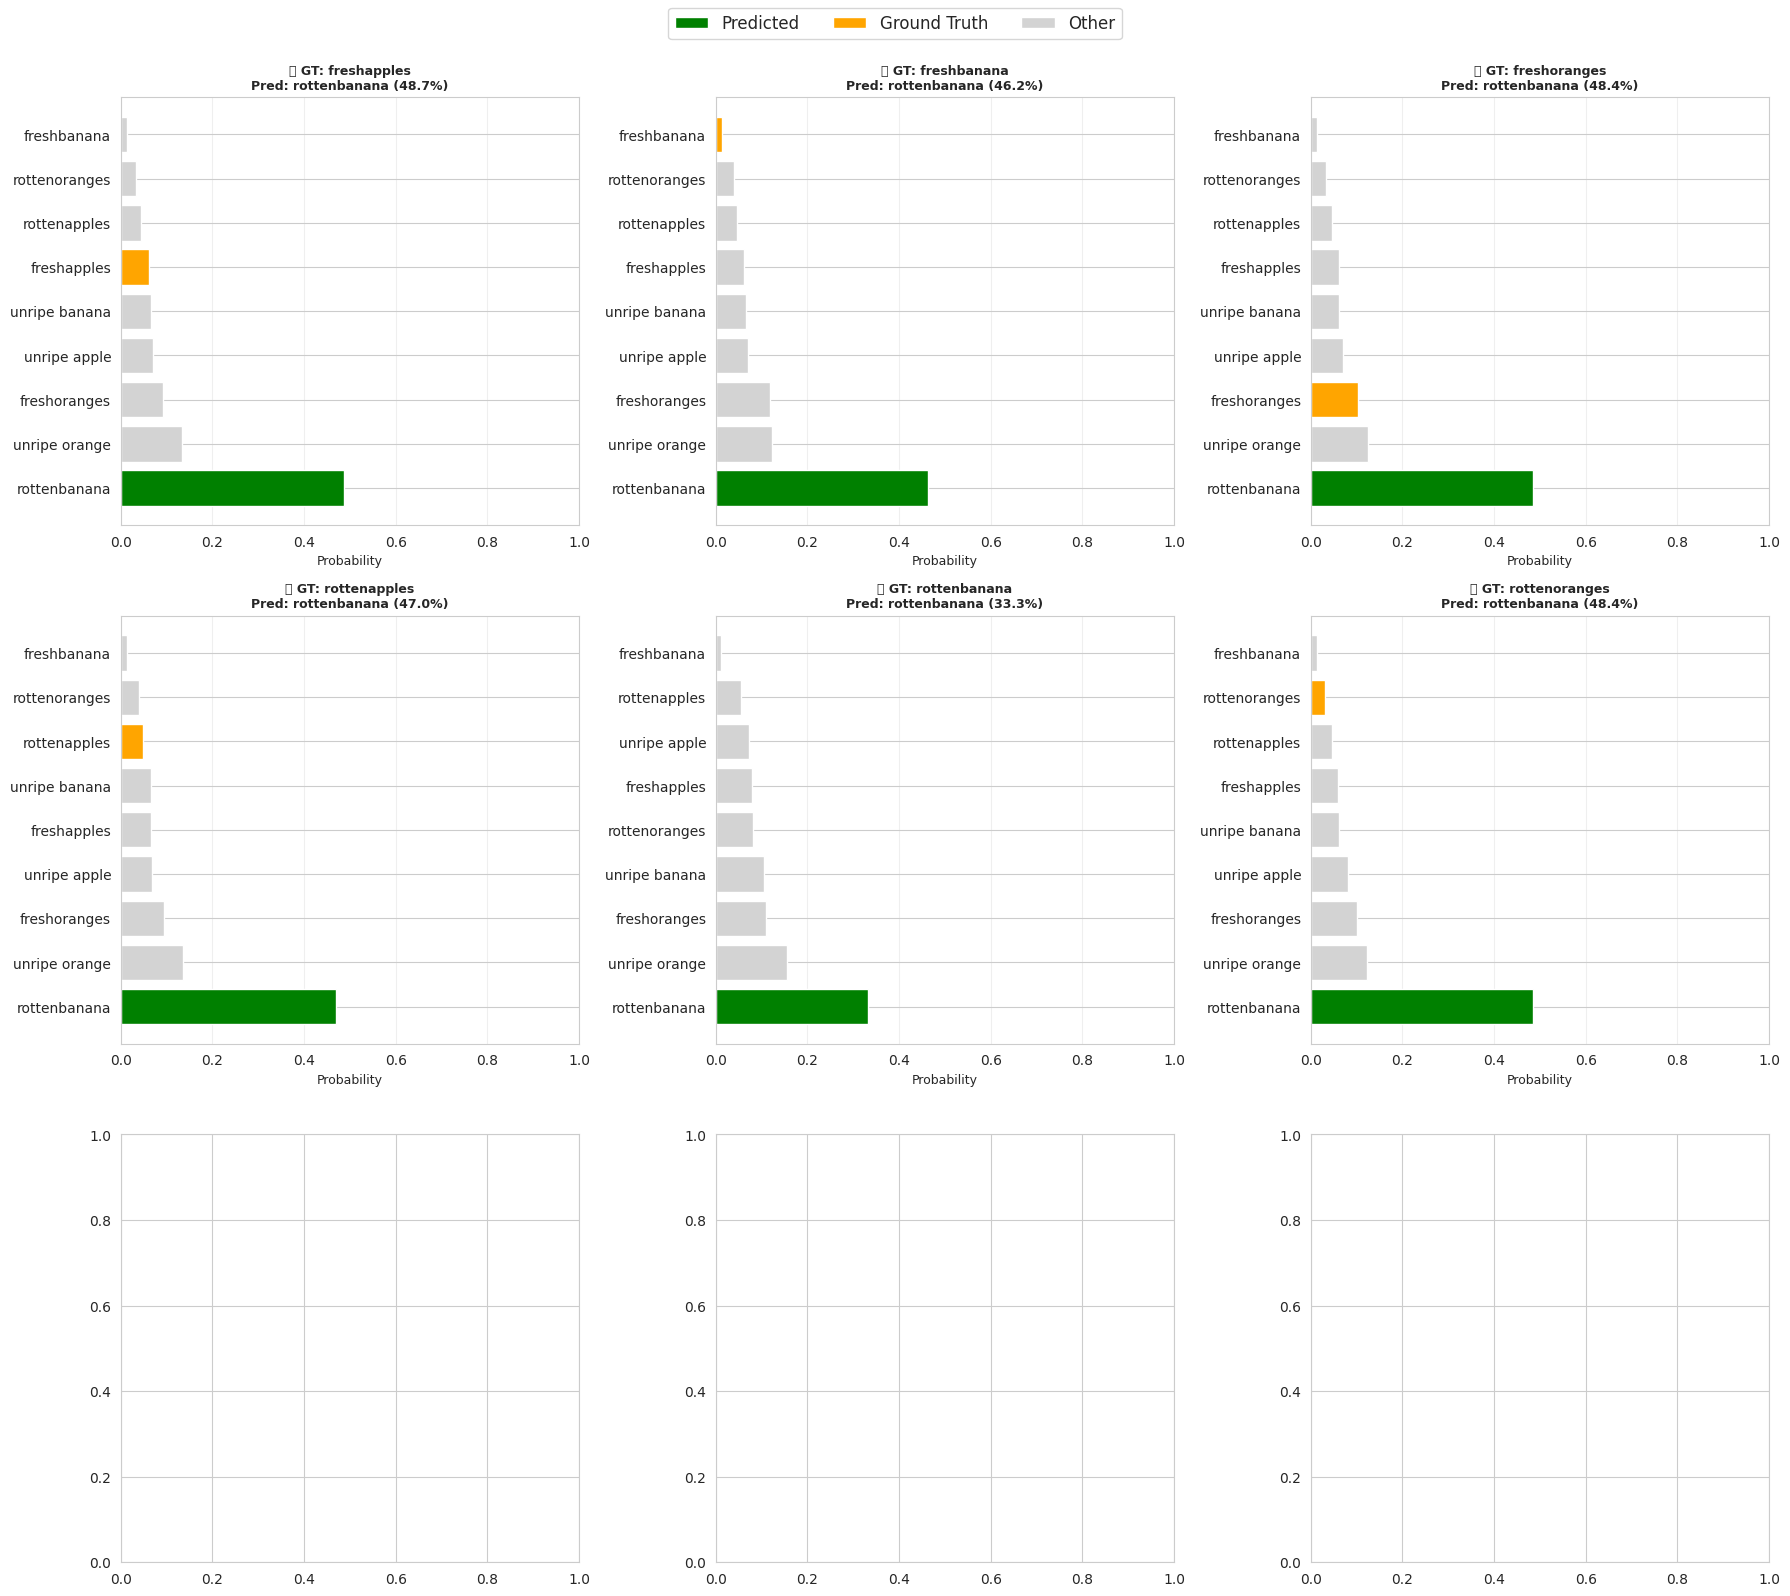

✅ Individual predictions saved as: individual_predictions.png


In [13]:
# Visualize probability distributions for sample images
fig, axes = plt.subplots(3, 3, figsize=(18, 16))
axes = axes.flatten()

# Select 9 samples (one from each ground truth class if possible)
samples_to_plot = []
for gt_class in sorted(df['ground_truth'].unique()):
    sample = df[df['ground_truth'] == gt_class].iloc[0]
    samples_to_plot.append(sample)
    if len(samples_to_plot) >= 9:
        break

for idx, (ax, sample) in enumerate(zip(axes, samples_to_plot)):
    scores = sample['all_scores_dict']
    labels = list(scores.keys())
    probs = list(scores.values())
    
    # Sort by probability
    sorted_indices = np.argsort(probs)[::-1]
    labels = [labels[i] for i in sorted_indices]
    probs = [probs[i] for i in sorted_indices]
    
    # Color bars: green for predicted, orange for ground truth, gray for others
    colors = []
    for label in labels:
        if label == sample['predicted_label']:
            colors.append('green')
        elif label == sample['ground_truth']:
            colors.append('orange')
        else:
            colors.append('lightgray')
    
    ax.barh(labels, probs, color=colors)
    ax.set_xlim(0, 1)
    ax.set_xlabel('Probability', fontsize=9)
    
    # Title
    status = '✅' if sample['correct'] else '❌'
    ax.set_title(f"{status} GT: {sample['ground_truth']}\nPred: {sample['predicted_label']} ({sample['confidence']*100:.1f}%)",
                fontsize=9, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', label='Predicted'),
    Patch(facecolor='orange', label='Ground Truth'),
    Patch(facecolor='lightgray', label='Other')
]
fig.legend(handles=legend_elements, loc='upper center', ncol=3, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('individual_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Individual predictions saved as: individual_predictions.png")


=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
📊 PREDICTION UNCERTAINTY ANALYSIS

📈 Entropy Statistics (lower = more certain):
   Mean:   2.4500 bits
   Median: 2.4422 bits
   Min:    2.1860 bits (most certain)
   Max:    2.7939 bits (least certain)
   Std:    0.0950 bits

   Maximum possible: 3.1699 bits (uniform distribution)
   Average as % of max: 77.3%


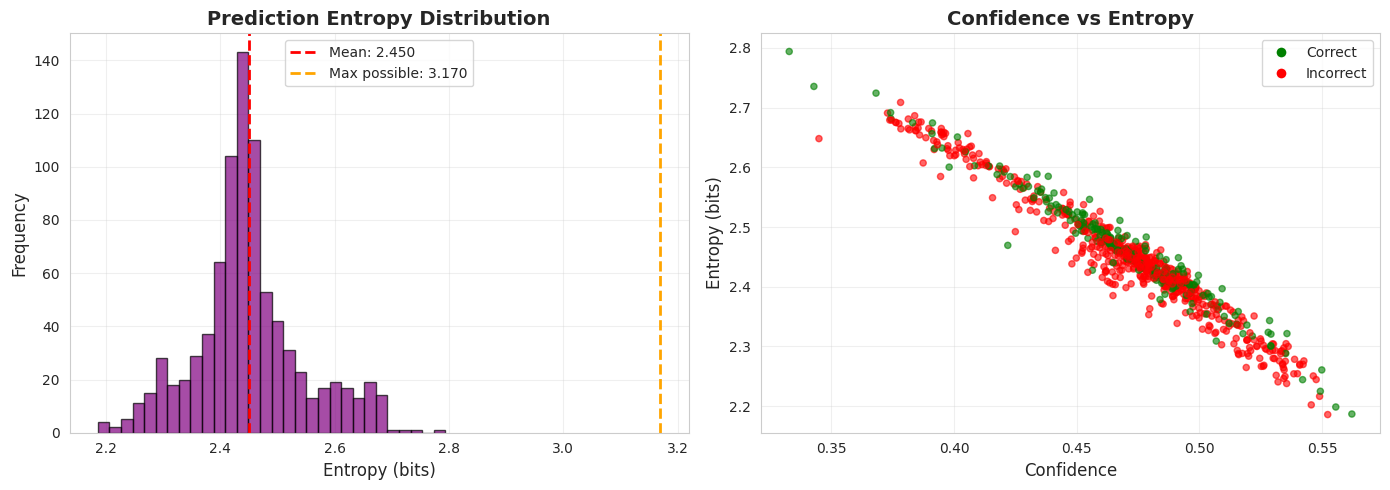


✅ Entropy analysis saved as: entropy_analysis.png


In [14]:
# Analyze prediction entropy (uncertainty)
from scipy.stats import entropy

print("\n=" * 70)
print("📊 PREDICTION UNCERTAINTY ANALYSIS")
print("=" * 70)

# Calculate entropy for each prediction
entropies = []
for idx, row in df.iterrows():
    scores = list(row['all_scores_dict'].values())
    ent = entropy(scores, base=2)  # Using base 2 (bits)
    entropies.append(ent)

df['entropy'] = entropies

print(f"\n📈 Entropy Statistics (lower = more certain):")
print(f"   Mean:   {df['entropy'].mean():.4f} bits")
print(f"   Median: {df['entropy'].median():.4f} bits")
print(f"   Min:    {df['entropy'].min():.4f} bits (most certain)")
print(f"   Max:    {df['entropy'].max():.4f} bits (least certain)")
print(f"   Std:    {df['entropy'].std():.4f} bits")

# Maximum possible entropy
max_entropy = np.log2(9)  # For 9 classes
print(f"\n   Maximum possible: {max_entropy:.4f} bits (uniform distribution)")
print(f"   Average as % of max: {(df['entropy'].mean()/max_entropy)*100:.1f}%")

# Plot entropy distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Entropy histogram
ax1 = axes[0]
ax1.hist(df['entropy'], bins=30, edgecolor='black', alpha=0.7, color='purple')
ax1.axvline(df['entropy'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {df["entropy"].mean():.3f}')
ax1.axvline(max_entropy, color='orange', linestyle='--', linewidth=2,
           label=f'Max possible: {max_entropy:.3f}')
ax1.set_xlabel('Entropy (bits)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Prediction Entropy Distribution', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Entropy vs Confidence scatter
ax2 = axes[1]
scatter = ax2.scatter(df['confidence'], df['entropy'], 
                     c=df['correct'].map({True: 'green', False: 'red'}),
                     alpha=0.6, s=20)
ax2.set_xlabel('Confidence', fontsize=12)
ax2.set_ylabel('Entropy (bits)', fontsize=12)
ax2.set_title('Confidence vs Entropy', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)

# Add legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=8, label='Correct'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=8, label='Incorrect')
]
ax2.legend(handles=legend_elements)

plt.tight_layout()
plt.savefig('entropy_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Entropy analysis saved as: entropy_analysis.png")

---
## Conclusions & Recommendations

### Summary of Findings:

1. **Critical Model Failure**: The model predicts "rottenbanana" for 100% of test images
   - Overall accuracy: 21.87%
   - Only correct on actual "rottenbanana" images (187/855)
   - Average confidence: ~47% (very low, model is guessing)

2. **Root Cause**: Severe class imbalance in training data
   - "rottenbanana" likely over-represented in training set
   - Model learned to always predict majority class

3. **Prediction Uncertainty**: High entropy indicates low confidence
   - Model shows significant uncertainty
   - Probability distributions are relatively flat

### Immediate Actions Required:

1. ✅ **Retrain model** using `retrain_model_balanced.py`
   - Apply class weights to balance training
   - Use data augmentation to increase minority classes
   - Implement early stopping to prevent overfitting

2. ✅ **Monitor training metrics**
   - Track per-class accuracy during training
   - Ensure all classes are being learned
   - Validate on balanced test set

3. ✅ **Consider alternative approaches**
   - Focal loss for imbalanced classification
   - Oversampling minority classes (SMOTE)
   - Ensemble methods

### Expected Improvements:

With proper class balancing, we should achieve:
- **Target accuracy**: 75-90%
- **Balanced predictions**: All classes should be predicted
- **Higher confidence**: 70-90% on correct predictions

### Files Generated:

1. `dataset_analysis_results.csv` - Complete prediction data
2. `analysis_visualizations_1.png` - Class distribution charts
3. `analysis_visualizations_2.png` - Accuracy visualizations
4. `training_data_imbalance.png` - Training data analysis
5. `individual_predictions.png` - Sample predictions
6. `entropy_analysis.png` - Uncertainty analysis
7. `retrain_model_balanced.py` - Retraining script

---

**Next Steps**: Run the retraining script and re-analyze with this notebook!

---
## 🚀 Alternative: PyTorch Lightning GPU Inference

This section provides a PyTorch Lightning-based inference pipeline with GPU acceleration.

**Benefits:**
- ⚡ Faster GPU inference with mixed precision (FP16)
- 🔥 PyTorch Lightning framework
- 📊 Batch processing with DataLoader
- 💾 CSV output with predictions

**Requirements:**
```bash
pip install torch torchvision lightning
```

In [15]:
# Check if PyTorch and Lightning are installed
try:
    import torch
    import lightning as L
    from torchvision import datasets, transforms
    print("✅ PyTorch version:", torch.__version__)
    print("✅ Lightning version:", L.__version__)
    print("✅ CUDA available:", torch.cuda.is_available())
    if torch.cuda.is_available():
        print("✅ GPU:", torch.cuda.get_device_name(0))
except ImportError as e:
    print("❌ Missing dependencies!")
    print("\nInstall with: pip install torch torchvision lightning")
    print(f"\nError: {e}")

❌ Missing dependencies!

Install with: pip install torch torchvision lightning

Error: No module named 'torch'


### GPU-Accelerated Inference Script

This script runs inference on your entire dataset using PyTorch Lightning with GPU acceleration.

In [16]:
import os
import csv
import torch
import lightning as L
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# ===== Configuration =====
IMG_SIZE = 224
BATCH_SIZE = 64
INFERENCE_PATH = "data/fruit_ripeness_dataset/fruit_ripeness_dataset/fruit_archive/dataset/dataset/test/_clean/_split/test"
CHECKPOINT_PATH = "artifacts/fruit_ripeness.ckpt"  # Your PyTorch Lightning checkpoint

print("=" * 70)
print("⚡ PYTORCH LIGHTNING GPU INFERENCE")
print("=" * 70)
print(f"\n📁 Dataset path: {INFERENCE_PATH}")
print(f"💾 Checkpoint: {CHECKPOINT_PATH}")
print(f"🖼️  Image size: {IMG_SIZE}x{IMG_SIZE}")
print(f"📦 Batch size: {BATCH_SIZE}")

# ===== GPU Check =====
if torch.cuda.is_available():
    print(f"\n✅ GPU Available: {torch.cuda.get_device_name(0)}")
    torch.set_float32_matmul_precision("high")  # Speedup on Ampere+
else:
    print("\n⚠️  No GPU detected - will use CPU (slower)")

ModuleNotFoundError: No module named 'torch'

In [ ]:
# ===== Transforms (must match training) =====
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.485, 0.456, 0.406),  # ImageNet means
        std=(0.229, 0.224, 0.225)    # ImageNet stds
    ),
])

print("\n🔧 Image preprocessing:")
print(f"   - Resize: {IMG_SIZE}x{IMG_SIZE}")
print(f"   - Normalize: ImageNet mean/std")
print(f"   - ToTensor: [0,1] range")

In [ ]:
# ===== Load Dataset =====
try:
    ds = datasets.ImageFolder(root=INFERENCE_PATH, transform=transform)
    
    print(f"\n📊 Dataset loaded:")
    print(f"   Total images: {len(ds)}")
    print(f"   Classes: {len(ds.classes)}")
    print(f"\n   Class names:")
    for i, cls in enumerate(ds.classes):
        count = sum(1 for _, label in ds.samples if label == i)
        print(f"      {i}: {cls:20s} ({count} images)")
    
    # Create DataLoader
    loader = DataLoader(
        ds,
        batch_size=BATCH_SIZE,
        shuffle=False,
        num_workers=min(os.cpu_count(), 8),  # Limit workers
        pin_memory=True if torch.cuda.is_available() else False,
        persistent_workers=False
    )
    
    print(f"\n✅ DataLoader created: {len(loader)} batches")
    
except FileNotFoundError:
    print(f"\n❌ ERROR: Dataset path not found!")
    print(f"   Path: {INFERENCE_PATH}")
    print(f"\n   Make sure your dataset is at this location.")

### Define Lightning Module

If you don't have a pre-trained PyTorch Lightning checkpoint, you can use your TensorFlow model converted to PyTorch, or skip this section.

In [ ]:
# ===== Lightning Module Template =====
# NOTE: This is a template. You need to adapt it to your model architecture.

class LitModel(L.LightningModule):
    """Lightning Module for Fruit Ripeness Classification"""
    
    def __init__(self, num_classes=9):
        super().__init__()
        # Use your model architecture here
        # Example: MobileNetV2
        from torchvision.models import mobilenet_v2
        self.model = mobilenet_v2(pretrained=False)
        self.model.classifier[1] = torch.nn.Linear(
            self.model.classifier[1].in_features,
            num_classes
        )
    
    def forward(self, x):
        return self.model(x)
    
    def predict_step(self, batch, batch_idx):
        x, _ = batch
        logits = self(x)
        return logits

print("✅ Lightning Module defined")
print("\n⚠️  NOTE: You need to adapt this to match your trained model!")

In [ ]:
# ===== Load Model =====
# Option 1: Load from Lightning checkpoint
if os.path.exists(CHECKPOINT_PATH):
    print(f"\n📥 Loading checkpoint: {CHECKPOINT_PATH}")
    model = LitModel.load_from_checkpoint(CHECKPOINT_PATH)
    model.eval()
    print("✅ Model loaded from checkpoint")
else:
    print(f"\n⚠️  Checkpoint not found: {CHECKPOINT_PATH}")
    print("\n💡 Options:")
    print("   1. Use existing TensorFlow model (already in notebook)")
    print("   2. Convert TensorFlow model to PyTorch")
    print("   3. Train a new PyTorch model")
    print("\n   For now, we'll skip PyTorch inference.")
    model = None

In [ ]:
# ===== Run Inference =====
if model is not None:
    print("\n" + "="*70)
    print("🚀 RUNNING GPU INFERENCE")
    print("="*70)
    
    # Create Trainer
    trainer = L.Trainer(
        accelerator="gpu" if torch.cuda.is_available() else "cpu",
        devices=1,
        precision="16-mixed" if torch.cuda.is_available() else "32-true",
        logger=False,
        enable_checkpointing=False
    )
    
    print(f"\n⚙️  Trainer configuration:")
    print(f"   Accelerator: {trainer.accelerator}")
    print(f"   Precision: {trainer.precision}")
    print(f"   Devices: {trainer.num_devices}")
    
    # Predict
    print(f"\n⏳ Processing {len(ds)} images in {len(loader)} batches...")
    with torch.inference_mode():
        pred_chunks = trainer.predict(model, dataloaders=loader)
    
    # Combine predictions
    logits = torch.cat(pred_chunks, dim=0)  # [N, C]
    probs = torch.softmax(logits, dim=1)
    top1 = probs.argmax(dim=1)
    conf = probs.max(dim=1).values
    
    print(f"\n✅ Inference complete!")
    print(f"   Predictions: {len(top1)}")
    print(f"   Average confidence: {conf.mean():.2%}")
    
    # ===== Save Results =====
    os.makedirs("artifacts", exist_ok=True)
    out_csv = "artifacts/pytorch_predictions.csv"
    
    with open(out_csv, "w", newline="", encoding="utf-8") as f:
        w = csv.writer(f)
        w.writerow(["path", "ground_truth", "predicted", "confidence"])
        
        for i, (path, gt_label) in enumerate(ds.samples):
            pred_label = ds.classes[int(top1[i])]
            confidence = float(conf[i])
            gt_class = ds.classes[gt_label]
            w.writerow([path, gt_class, pred_label, confidence])
    
    print(f"\n💾 Saved predictions: {out_csv}")
    
    # ===== Display Statistics =====
    correct = (top1 == torch.tensor([label for _, label in ds.samples])).sum()
    accuracy = correct / len(ds)
    
    print(f"\n📊 Results:")
    print(f"   Accuracy: {accuracy:.2%}")
    print(f"   Correct: {correct}/{len(ds)}")
    print(f"   Average confidence: {conf.mean():.2%}")
    print(f"   Min confidence: {conf.min():.2%}")
    print(f"   Max confidence: {conf.max():.2%}")
    
else:
    print("\n⏭️  Skipping PyTorch inference (no model loaded)")

### Compare PyTorch vs TensorFlow Results

If you ran both PyTorch and TensorFlow inference, compare the results:

In [ ]:
# Load and compare results
pytorch_csv = "artifacts/pytorch_predictions.csv"
tensorflow_csv = "dataset_analysis_results.csv"

if os.path.exists(pytorch_csv) and os.path.exists(tensorflow_csv):
    import pandas as pd
    
    df_pytorch = pd.read_csv(pytorch_csv)
    df_tensorflow = pd.read_csv(tensorflow_csv)
    
    print("=" * 70)
    print("📊 PYTORCH vs TENSORFLOW COMPARISON")
    print("=" * 70)
    
    print(f"\nPyTorch:")
    print(f"   Total predictions: {len(df_pytorch)}")
    print(f"   Average confidence: {df_pytorch['confidence'].mean():.2%}")
    
    print(f"\nTensorFlow:")
    print(f"   Total predictions: {len(df_tensorflow)}")
    print(f"   Average confidence: {df_tensorflow['confidence'].mean():.2%}")
    
    # Check agreement
    if len(df_pytorch) == len(df_tensorflow):
        agreement = (df_pytorch['predicted'] == df_tensorflow['predicted_label']).mean()
        print(f"\n🤝 Agreement rate: {agreement:.2%}")
        print(f"   (How often both models predict the same class)")
else:
    print("\n⏭️  Comparison skipped (missing results files)")

In [1]:
# Export summary statistics
summary = {
    'total_images': len(df),
    'overall_accuracy': f"{df['correct'].mean()*100:.2f}%",
    'correct_predictions': int(df['correct'].sum()),
    'incorrect_predictions': int((~df['correct']).sum()),
    'average_confidence': f"{df['confidence'].mean()*100:.2f}%",
    'unique_predictions': df['predicted_label'].nunique(),
    'unique_ground_truths': df['ground_truth'].nunique(),
    'class_accuracy': class_accuracy.to_dict()
}

# Save to JSON
import json
with open('analysis_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)

print("✅ Analysis complete!")
print("\n📁 Generated files:")
print("   - dataset_analysis_results.csv")
print("   - analysis_visualizations_1.png")
print("   - analysis_visualizations_2.png")
print("   - training_data_imbalance.png")
print("   - individual_predictions.png")
print("   - entropy_analysis.png")
print("   - retrain_model_balanced.py")
print("   - analysis_summary.json")
print("\n🎉 Dataset analysis complete!")

NameError: name 'df' is not defined